In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_day = session.query(Measurement.date).\
    order_by((Measurement.date).\
    desc()).first()
most_recent_day

('2017-08-23')

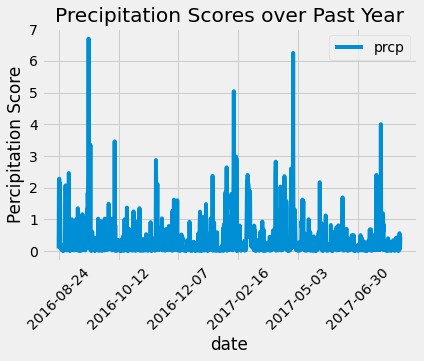

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
past_year_precip_data = session.query(Measurement.date, Measurement.prcp).\
    order_by((Measurement.date).asc()).\
    filter(Measurement.date > one_year_ago).\
    filter(Measurement.prcp).all()
    
    
# Save the query results as a Pandas DataFrame and set the index to the date column
past_year_precip_df = pd.DataFrame(past_year_precip_data)
past_year_precip_df.set_index('date', inplace=True)
# Sort the dataframe by date
past_year_precip_df.sort_values(by=['date'], ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
past_year_precip_df.plot()
plt.title("Precipitation Scores over Past Year")
plt.ylabel("Percipitation Score")
plt.xticks(rotation=45)
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
past_year_precip_df.describe()

,prcp
count,1142.000000
mean,0.311357
std,0.576134
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
total_number_of_stations = session.query(Measurement.station).group_by(Measurement.station).\
    count()
total_number_of_stations

9

In [41]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# ID of the most active station
most_active_station = most_active_stations[0][0]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_high_avg_of_station = session.query(Measurement.station, func.min(Measurement.tobs), 
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()
low_high_avg_of_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [67]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data_past_12_months_station = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station==most_active_station).\
    order_by((Measurement.date).asc()).\
    filter(Measurement.date > one_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
past_year_temp_station = pd.DataFrame(temp_data_past_12_months_station)
past_year_temp_station.set_index('station', inplace=True)

past_year_temp_station.head()

,tobs
station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


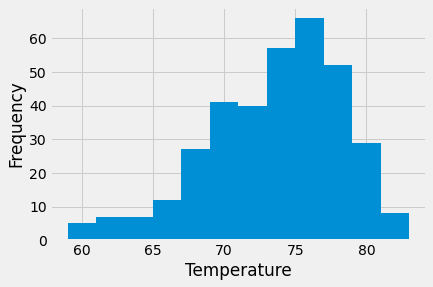

In [70]:
# Plotting a histogram from the dataframe above.
plt.hist(past_year_temp_station['tobs'], 12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.show()

# Close session

In [71]:
# Close Session
session.close()